In [1]:
import numpy as np
from numpy import e
from matplotlib import pyplot as plt
import scipy
from scipy.integrate import odeint
import pandas as pd

from tabulate import tabulate

import phaseportrait
  
# importing the style package
from matplotlib import style  
# using the style for the plot
plt.style.use('seaborn-v0_8-darkgrid')
floatfmt = '.2f'

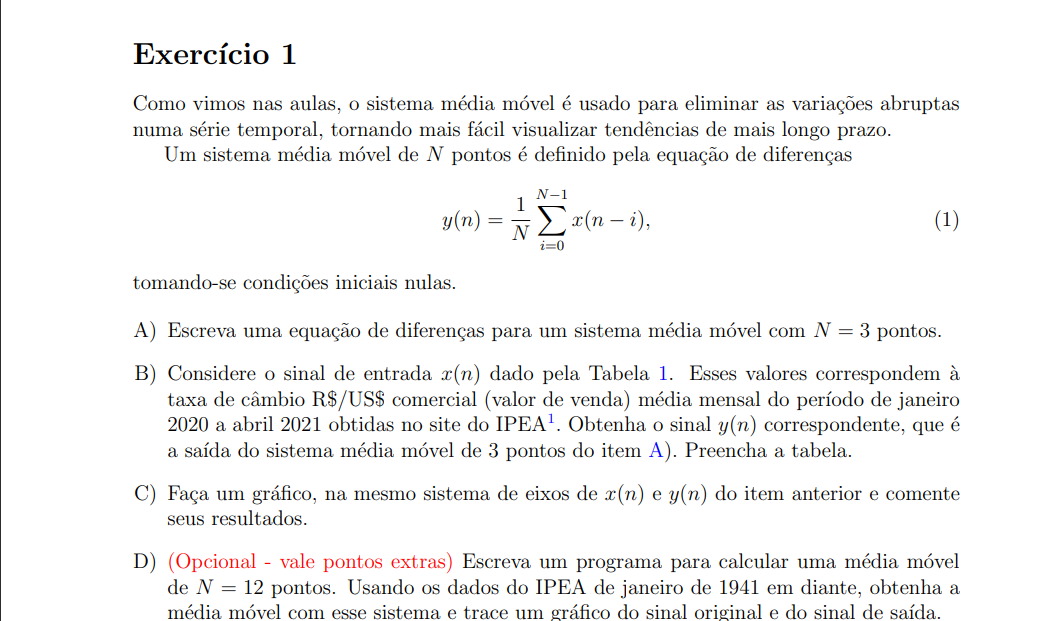

In [2]:
def moving_average(x_n, n):
    y_n = []
    v_n = []
    for i, x in enumerate(x_n):
        min_index = max(0, i-n)
        v = x_n[min_index:i]
        if len(v) < 3:
            v_n.append([i, [], x, np.nan])
            y_n.append(np.nan)
            continue
        ma = 1/len(v) * sum(v)
        v_n.append([i, v, x, ma])
        y_n.append(ma)
    return y_n, v_n

**A)**


$y(n) = 1/3*(x(n-1) + x(n-2) + x(n-3))$

**B)**

In [3]:
x_n = [4.15,4.34,4.88,5.33,5.64,5.20,5.28,5.46,5.40,5.63,5.42,5.15,5.36,5.42,5.65,5.56,]

In [4]:
y_n, v_n = moving_average(x_n, 3)
headers = ['i.', 'v', 'x(n)', 'y(n)']
print(tabulate(v_n, headers=headers, floatfmt=floatfmt))

  i.  v                     x(n)    y(n)
----  ------------------  ------  ------
   0  []                    4.15  nan
   1  []                    4.34  nan
   2  []                    4.88  nan
   3  [4.15, 4.34, 4.88]    5.33    4.46
   4  [4.34, 4.88, 5.33]    5.64    4.85
   5  [4.88, 5.33, 5.64]    5.20    5.28
   6  [5.33, 5.64, 5.2]     5.28    5.39
   7  [5.64, 5.2, 5.28]     5.46    5.37
   8  [5.2, 5.28, 5.46]     5.40    5.31
   9  [5.28, 5.46, 5.4]     5.63    5.38
  10  [5.46, 5.4, 5.63]     5.42    5.50
  11  [5.4, 5.63, 5.42]     5.15    5.48
  12  [5.63, 5.42, 5.15]    5.36    5.40
  13  [5.42, 5.15, 5.36]    5.42    5.31
  14  [5.15, 5.36, 5.42]    5.65    5.31
  15  [5.36, 5.42, 5.65]    5.56    5.48


#### C)

Através do gráfico, percebe-se a função de filtro passa-baixa do sistema média móvel, já que a linha dos pontos da média móvel são mais suaves que o sinal original 

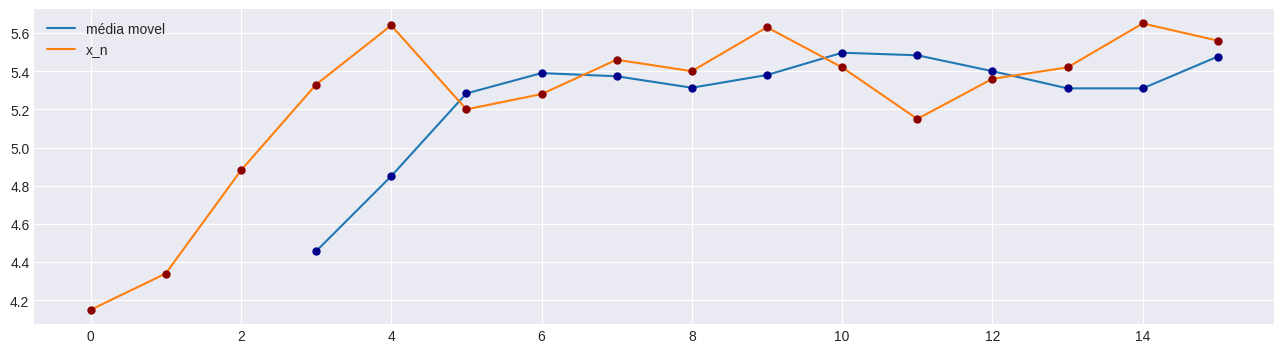

In [5]:
plt.figure(figsize=[16,9])
plt.subplot(211)
plt.plot(y_n, label='média movel')
plt.plot(x_n, label='x_n')
plt.scatter(range(len(x_n)), y_n, s=25, c='darkblue', zorder=3)
plt.scatter(range(len(x_n)), x_n, s=25, c='darkred', zorder=3)
plt.legend()
plt.show()

#### D)
Os dados foram salvos em um arquivo chamado 'ipea.csv', com as colunas date e value

Podemos ver que há uma quebra significativa no gráfico a partir de (aproximadamente) 1995, devido à mudança de moeda (Plano Real). É possível que haja outras quebras como essa ao longo do tempo, imperceptíveis pela escala do gráfico. Por isso, três gráficos são mostrados:
- t > 1995
- t < 1948
- 1960 < t < 1980

In [6]:
ipea = pd.read_csv('ipea.csv')
# converte o mês em proporção de 0-1
ipea['date'] = ipea['date'].apply(lambda x: int(x) + (x-int(x))*100/12)

## 1995 - ##


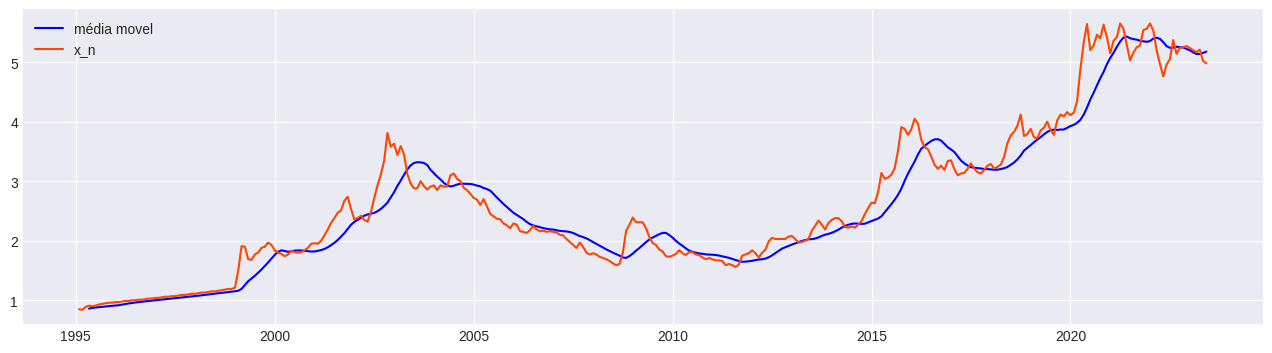

## - 1948 ##


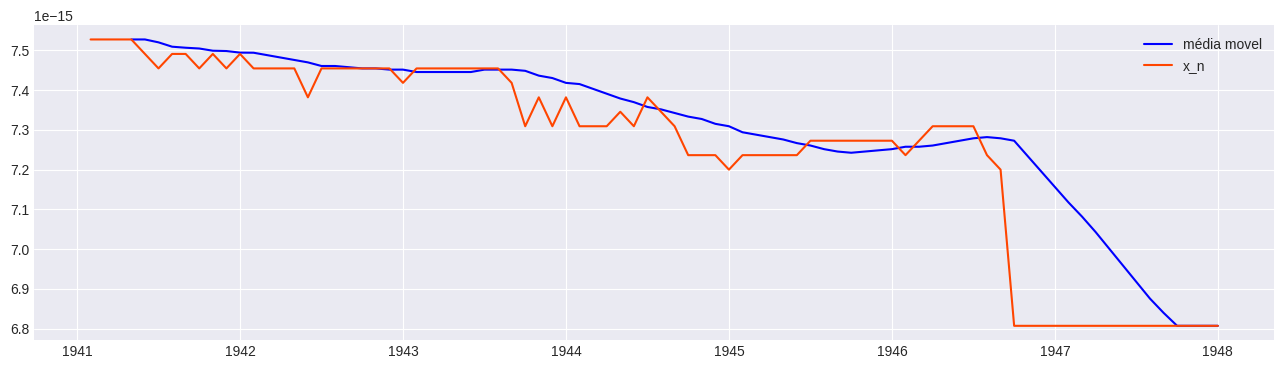

## 1960 - 1980 ##


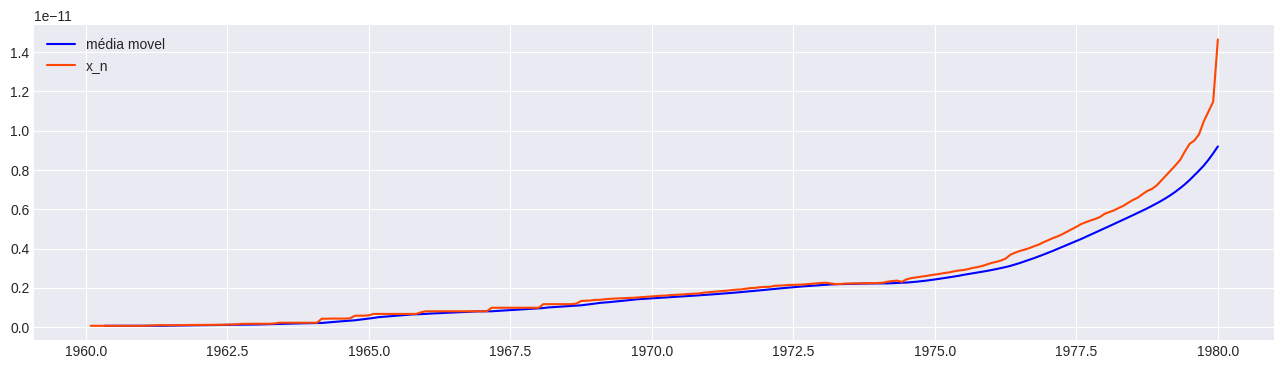

In [7]:
print('## 1995 - ##')
plt.figure(figsize=[16,9])
plt.subplot(211)
t = 1995
dates = ipea.date[ipea.date > t]
x_n = ipea.value[ipea.date > t].values
y_n, v_n = moving_average(x_n, 12)
plt.plot(dates, y_n, c='blue', label='média movel')
plt.plot(dates, x_n, c='orangered', label='x_n')
plt.legend()
plt.show()
plt.figure(figsize=[16,9])
plt.subplot(211)

print('## - 1948 ##')
t = 1948
dates = ipea.date[ipea.date < t]
x_n = ipea.value[ipea.date < t].values
y_n, v_n = moving_average(x_n, 12)

plt.plot(dates, y_n, c='blue', label='média movel')
plt.plot(dates, x_n, c='orangered', label='x_n')
plt.legend()
plt.show()

plt.figure(figsize=[16,9])
plt.subplot(211)

print('## 1960 - 1980 ##')
t1 = 1960
t2 = 1980
dates = ipea.date[(ipea.date >= t1) & (ipea.date <= t2)]
x_n = ipea.value[(ipea.date >= t1) & (ipea.date <= t2)].values
y_n, v_n = moving_average(x_n, 12)

plt.plot(dates, y_n, c='blue', label='média movel')
plt.plot(dates, x_n, c='orangered', label='x_n')
plt.legend()
plt.show()

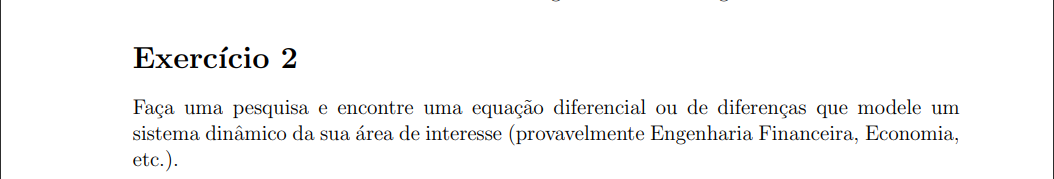
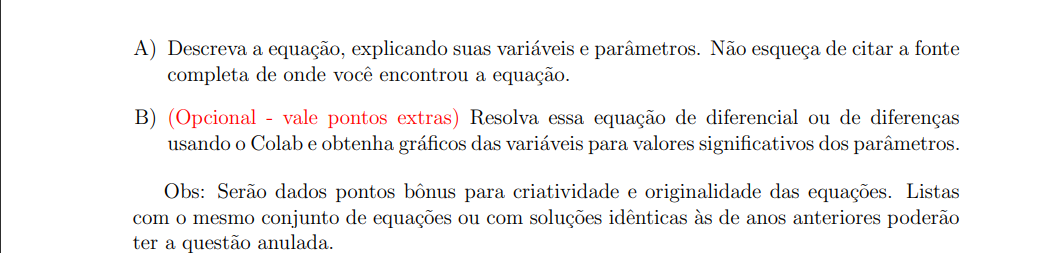

Equação diferencial Bass Difusion [https://en.wikipedia.org/wiki/Bass_diffusion_model]

$$
\frac{dF(t)}{dt} - [(1-F)(p+qF)] = 0
$$

Esta equação modela o comportamento no tempo da adoção de um novo produto em uma população 

Onde

- $F(t)$ é a adoção no tempo
- $p [0.01, 0.03]$ o coeficiente de inovação que indica novos adotantes do produtos a partir de motivação interna 
- $q [0.3, 0.5]$ o coeficiente de imitação que indica novos adotantes a partir da influência dos atuais adotantes 

**B)**

Usando $p=0.25$, $q=0.5$

p está fora do valor usual, para realçar a derivada de f (novos adotantes a partir de motivação interna)

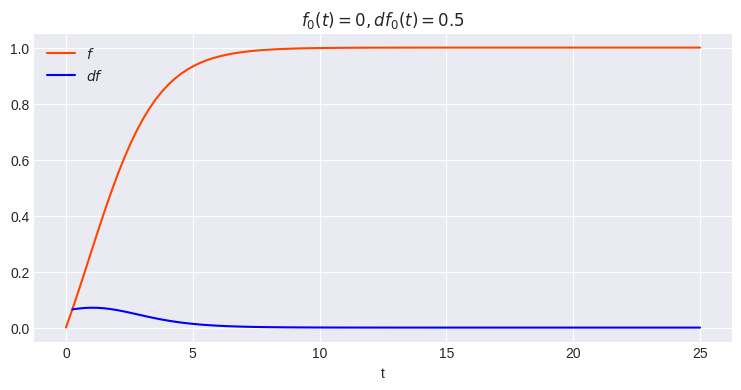

In [8]:
def bass_difusion_odeint(f, df):
    p = 0.25
    q = 0.5

    df = (1-f)*(p+q*f)

    return df

fig, axs = plt.subplots(1,1, figsize=(9,4))
t = np.linspace(0, 25, 100)
sol = odeint(bass_difusion_odeint, [0], t)
axs.plot(t, sol[:, 0], 'orangered', label='$f$')
axs.plot(t[1:], np.diff(sol[:, 0]), 'blue', label='$df$')
axs.legend()
axs.set_xlabel('t')
_ = axs.set_title(f'$f_0(t)=0, df_0(t)=0.5$')

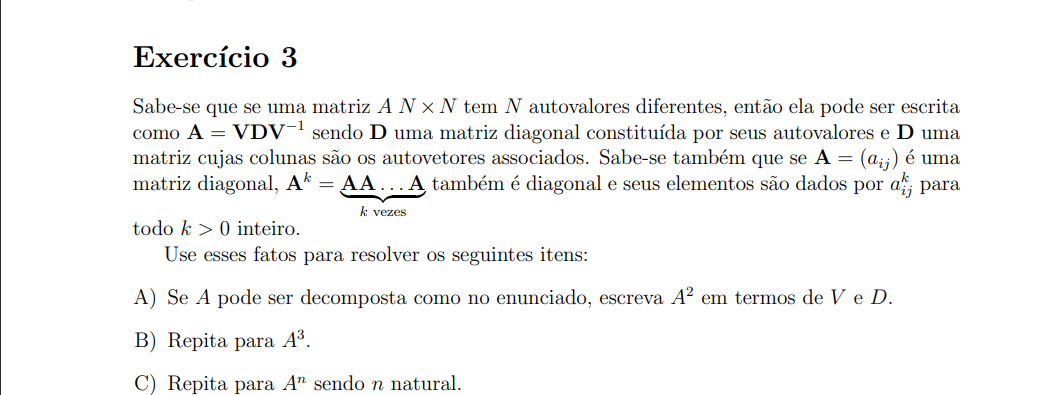

**A)**

$A^2 = A*A = VD(V^{-1} * V)DV^{-1}$

$A^2 = V(D*I_{n}*D)V^{-1}$

$A^2 = VD^2V^{-1}$

**B)**

$A^3 = A^2*A = VD^2(V^{-1} * V)DV^{-1}$

$A^3 = V(D^2*I_{n}*D)V^{-1}$

$A^3 = VD^3V^{-1}$

**C)**

$A^n = A*A^{n-1}$

$A^n = VDV^{-1} * (VDV^{-1}) * (VDV^{-1}) * (VDV^{-1}) ...$

$A^n = VDV^{-1} * ((VD(V^{-1} * V)DV^{-1}) * (VDV^{-1}) ...$

$A^n = VDV^{-1} * (VDIDV^{-1}) * (VDV^{-1}) ...$

$A^n = VDV^{-1} * (VD^2V^{-1}) * (VDV^{-1}) ...$

$A^n = VDV^{-1} * VD^{n-1}V^{-1}$

$A^n = VD^nV^{-1}$

In [9]:
A = np.array([[2,0,0],
              [0,1,0],
              [0,0,3],])
A_5 = np.linalg.matrix_power(A,5)
evalues, evectors = np.linalg.eig(A)
A_5 ==  evectors * evalues**5 * np.linalg.inv(evectors)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

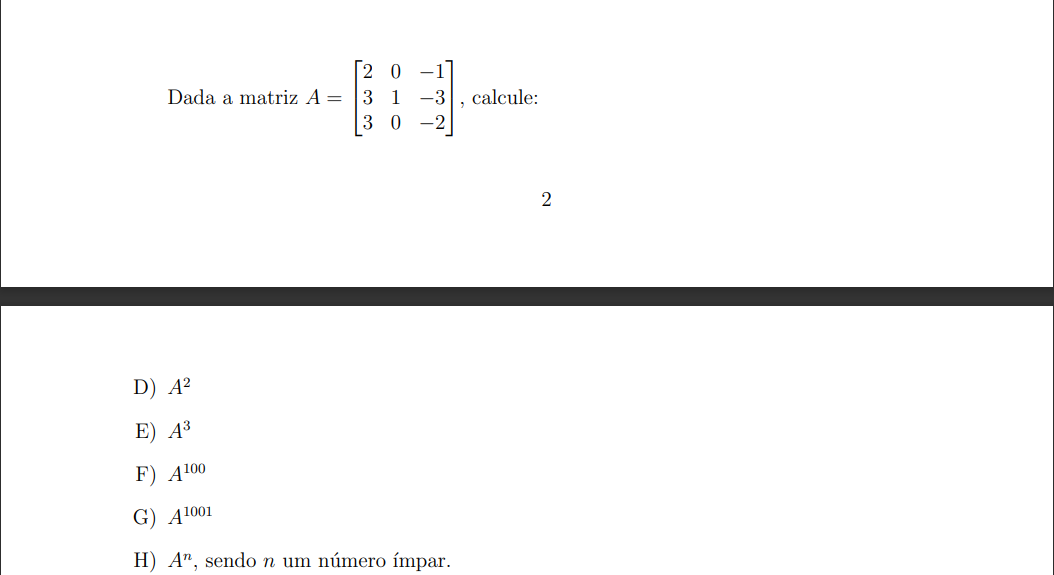

**D)**

In [10]:
A = np.array([[2,0,-1],
              [3,1,-3],
              [3,0,-2]])
print('A² = ')
print(np.linalg.matrix_power(A,4))

A² = 
[[1 0 0]
 [0 1 0]
 [0 0 1]]


Portanto
$A^2 = I_3 = VDV^{-1} \implies V=I_3 ; D = [1,1,1]$

**E)** 

$A^3 = A^2*A = A$

**F)** 

$A^{100} = (A^2)^{50} = I$

**G)** 

$A^{1001} = A^{1000}*A = (I)^{500}*A = A$

**H)** 

$A^{n} = A^{n-1}*A = (I)^{(n-1)/2}*A = A$

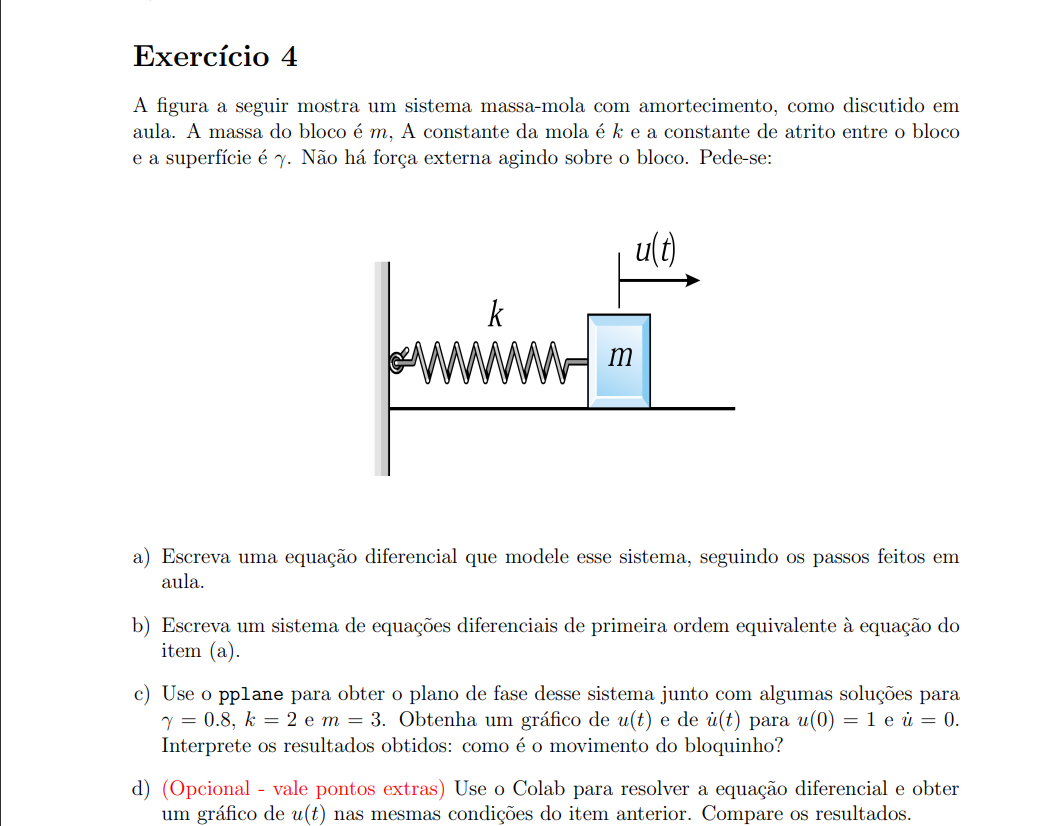

**A)** 

$m\ddot{u} + \gamma\dot{u} + ku = 0$

$m\dot{u_2} + \gamma u_2 + ku_1 = 0$

**B)**

$x_1 = u$

$x_2 = \dot{u}$

$\dot{x_1} = \dot{u} = x_2$

$\dot{x_2} = \ddot{u} = (-kx_1 - \gamma x_2)/m$

\begin{equation*}
\dot{
\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}} = 
\begin{bmatrix}
0 & 1\\
-k/m & -\gamma/m\\
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}
\end{equation*}

**C)**

/home/fernandopapi/.cache/pypoetry/virtualenvs/mbausp-XlZAh_dq-py3.8/lib/python3.8/site-packages/phaseportrait/streamlines/streamlines_base.py:128: RuntimeWarning: divide by zero encountered in divide
  deltat = np.min(self.get_delta_coordinates(*coords)/(10*np.abs(_speed)))


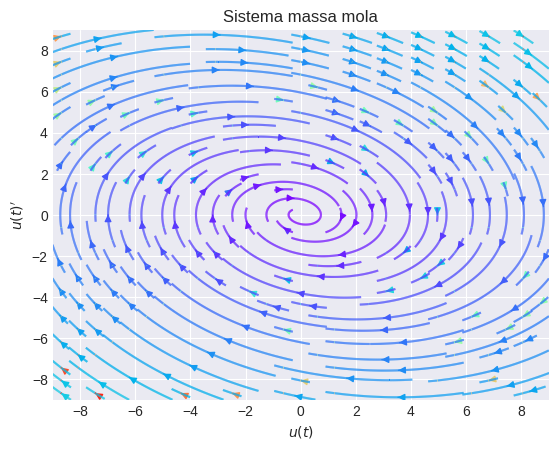

In [11]:
def mass_spring(x, dx):
    k = 2
    m = 3
    gamma = 0.8
    return dx, (-k*x - gamma*dx)/m

MassSpring = phaseportrait.PhasePortrait2D(mass_spring, [-9, 9], Title='Sistema massa mola', xlabel=r"$u(t)$", ylabel=r"$u(t)'$")
_ = MassSpring.plot()

O sistema apresentará comportamento oscilatório, com momentos de aceleração e desaceleração. O coeficiente de atrito fará com que o sistema convirja para a posição $u=0$, eventualmente. Também a dissipação da energia fara com que a velocidade $u'=0$ seja atingida em regime permanente

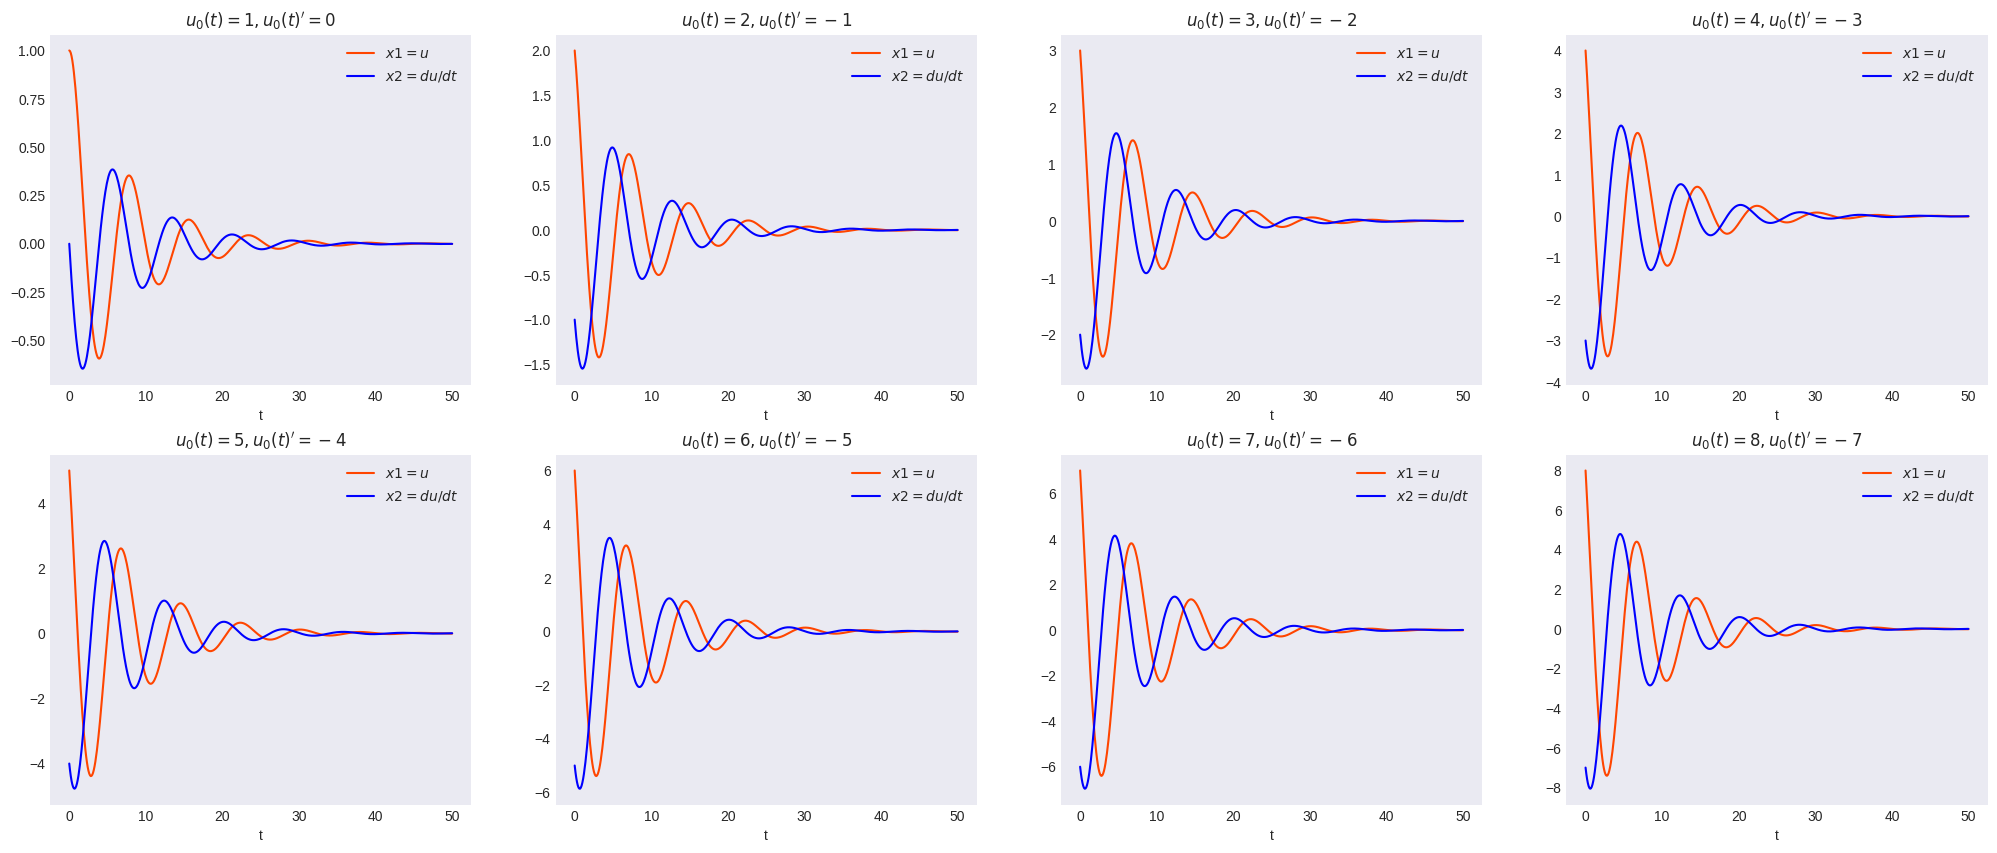

In [12]:
def mass_spring_odeint(x, t):
    u, du = x
    k = 2
    m = 3
    gamma = 0.8
    return [du, (-k*u - gamma*du)/m]


fig, axs = plt.subplots(2,4, figsize=(25,10))
t = np.linspace(0, 50, 500)
axs = axs.flatten()
for index,init_condit in enumerate(list(zip(range(1,9), range(0,-8,-1)))):
    x0 = init_condit
    sol = odeint(mass_spring_odeint, x0, t)
    axs[index].plot(t, sol[:, 0], 'orangered', label='$x1 = u$')
    axs[index].plot(t, sol[:, 1], 'blue', label='$x2 = du/dt$')
    axs[index].grid()
    axs[index].legend()
    axs[index].set_xlabel('t')
    axs[index].set_title(f'$u_0(t)={init_condit[0]}, u_0(t)\'={init_condit[1]}$')
    

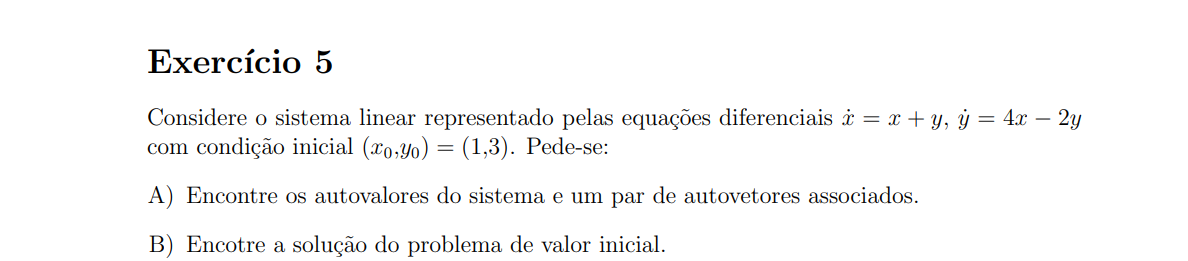

**A)**

\begin{equation*}
\begin{bmatrix}
\mathbf{\dot{x}}\\
\mathbf{\dot{y}}
\end{bmatrix} = 
\begin{bmatrix}
1 & 1\\
4 & -2\\
\end{bmatrix}
\begin{bmatrix}
\mathbf{x}\\
\mathbf{y}
\end{bmatrix}
\end{equation*}

\begin{equation*}
\lambda^2 + \lambda -6 = 0
\end{equation*}

Os autovalores são, então

$\lambda_1 = 2$

$\lambda_2 = -3$

Para $\lambda_1 = 2$:

\begin{equation*}
\begin{bmatrix}
1 & 1\\
4 & -2\\
\end{bmatrix} *
\begin{bmatrix}
\mathbf{v_{1}}
\end{bmatrix} =
\begin{bmatrix}
2\\
2
\end{bmatrix} *
\begin{bmatrix}
\mathbf{v_{1}}
\end{bmatrix}
\end{equation*}

$$ v_{11} + v_{12} = 2v_{11} $$
$$ 4v_{11} - 2v_{12} = 2v_{12} $$

Portanto:

$$ v_{11} = v_{12} $$

Podemos escolher:

$$ \mathbf{v_{1}} = \begin{bmatrix}
1 & 1
\end{bmatrix}^T $$

Para $\lambda_2 = -3$:

\begin{equation*}
\begin{bmatrix}
1 & 1\\
4 & -2\\
\end{bmatrix} *
\begin{bmatrix}
\mathbf{v_{2}}
\end{bmatrix} =
\begin{bmatrix}
-3\\
-3
\end{bmatrix} *
\begin{bmatrix}
\mathbf{v_{2}}
\end{bmatrix}
\end{equation*}

$$ v_{21} + v_{22} = -3v_{21} $$
$$ 4v_{21} - 2v_{22} = -3v_{22} $$

Portanto:

$$ v_{22} = -4v_{21} $$

Podemos escolher:

$$ \mathbf{v_{2}} = \begin{bmatrix}
1 & -4
\end{bmatrix}^T $$



In [13]:
M = np.array([[1, 1],
              [4, -2]])
eigenvalues, eigenvectors = np.linalg.eig(M)
print('autovalores')
print(eigenvalues)
print()
print('autovetores')
print(eigenvectors)

autovalores
[ 2. -3.]

autovetores
[[ 0.70710678 -0.24253563]
 [ 0.70710678  0.9701425 ]]


**B)**

Temos que, para a condição inicial dada (1, 3) e t=0:

$$ x(t) = c_1 * v_{11} * e^{-2t} + c_2 * v_{12} * e^{-3t}$$

$$ y(t) = c_1 * v_{21} * e^{-2t} + c_2 * v_{22} * e^{-3t}$$

$$ \implies $$

$$ 1 = c_1 + c_2 $$

$$ 3 = c_1 - 4c_2 $$

$$ \implies [c_1, c_2] = [7/5, -2/5] $$


In [14]:
def x(t):
    return 7/5*e**(2*t) - 2/5*e**(-3*t)
def y(t):
    return 7/5*e**(2*t) + 8/5*e**(-3*t)

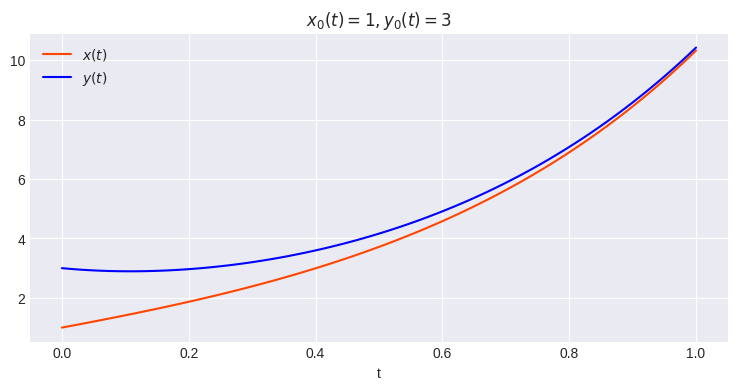

In [15]:
fig, axs = plt.subplots(1,1, figsize=(9,4))
t = np.linspace(0, 1, 100)
axs.plot(t, [x(t) for t in t], 'orangered', label='$x(t)$')
axs.plot(t, [y(t) for t in t], 'blue', label='$y(t)$')
axs.legend()
axs.set_xlabel('t')
_ = axs.set_title(f'$x_0(t)=1, y_0(t)=3$')

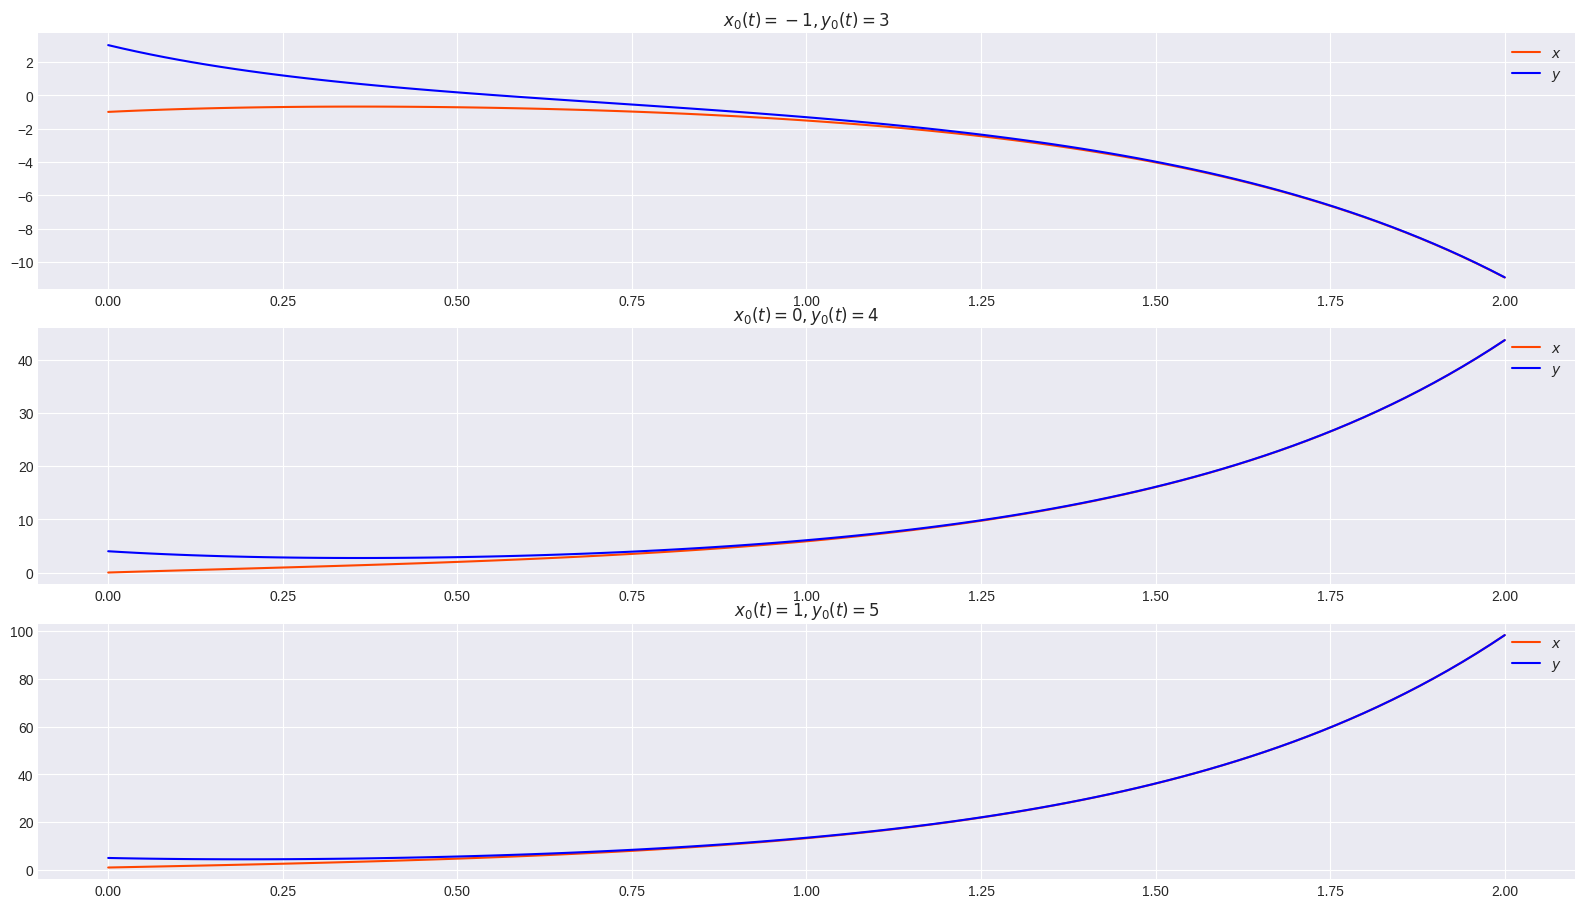

In [16]:
def q4_odeint(u, t):
    x, y = u
    dx = x + y
    dy = 4*x - 2*y
    return [dx, dy]

fig, axs = plt.subplots(3,1, figsize=(16,9))
plt.tight_layout()
t = np.linspace(0, 2, 100)
axs = axs.flatten()
for index,init_condit in enumerate(list(zip(range(-1,2), range(3,6)))):
    x0 = init_condit
    sol = odeint(q4_odeint, x0, t)
    axs[index].plot(t, sol[:, 0], 'orangered', label='$x$')
    axs[index].plot(t, sol[:, 1], 'blue', label='$y$')
    axs[index].legend()
    axs[index].set_title(f'$x_0(t)={x0[0]}, y_0(t)={x0[1]}$')

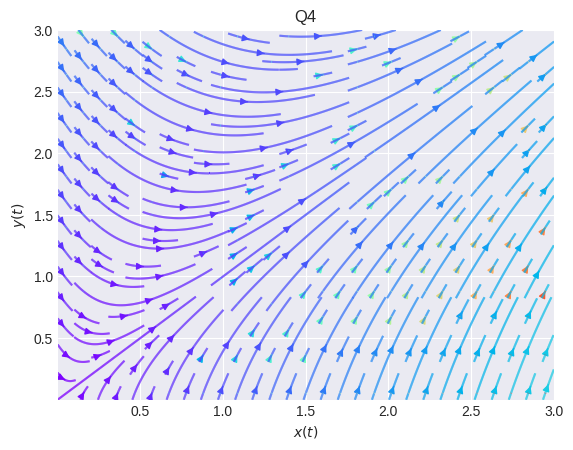

In [17]:
def q4(x, y):
    dx = x + y
    dy = 4*x - 2*y
    return [dx, dy]

Q4 = phaseportrait.PhasePortrait2D(q4, [0.001, 3], Title='Q4', xlabel=r"$x(t)$", ylabel=r"$y(t)$", full_output=False)
_ = Q4.plot()

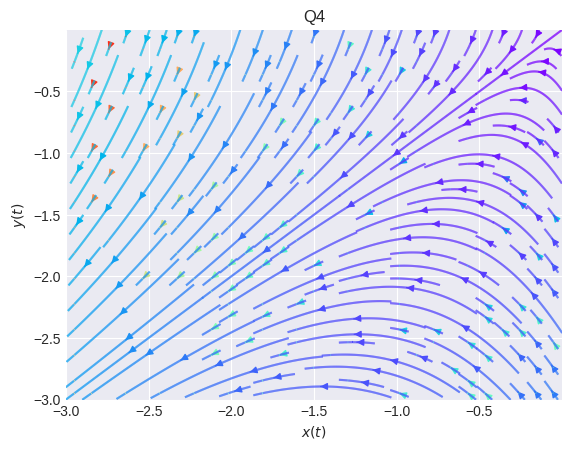

In [18]:
Q4 = phaseportrait.PhasePortrait2D(q4, [-3, -0.001], Title='Q4', xlabel=r"$x(t)$", ylabel=r"$y(t)$", full_output=False)
_ = Q4.plot()